# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [19]:
!pip install openpyxl

DEPRECATION: pytorch-lightning 1.6.0 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [54]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 487.6 kB/s eta 0:00:02
   ------- -------------------------------- 122.9/626.3 kB 1.2 MB/s eta 0:00:01
   --------------- ------------------------ 235.5/626.3 kB 1.6 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.6.0 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [10]:
from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [86]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.6.0 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Define the URL
url = "https://www.airlinequality.com/airline-reviews/british-airways/"

# Create lists to store extracted data
titles, ratings, dates, reviews = [], [], [], []
traveller_type, seat_type, route, date_flown = [], [], [], []
seat_comfort, cabin_staff, ground_service, value_money, recommended = [], [], [], [], []

# Function to scrape reviews from a single page
def scrape_page(url):
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to retrieve the page.")
        return

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find each review container
    for review_container in soup.find_all('article', {'itemprop': 'review'}):
        # Extract review title
        title = review_container.find('h2', {'class': 'text_header'}).get_text(strip=True)
        titles.append(title)
        
        # Extract review rating
        rating_div = review_container.find('div', {'itemprop': 'reviewRating'})
        rating_value = rating_div.find('span', {'itemprop': 'ratingValue'}).get_text(strip=True) if rating_div else None
        ratings.append(int(rating_value) if rating_value else None)

        
        # Extract review date
        date = review_container.find('time').get_text(strip=True)
        dates.append(date)

        # Extract review content
        review = review_container.find('div', {'class': 'text_content'}).get_text(strip=True)
        reviews.append(review)
        
        # Extract additional details
        review_details = review_container.find_all('td', {'class': 'review-rating-header'})
        
        # Type of Traveller
        traveller_type.append(review_details[0].find_next('td').get_text(strip=True) if len(review_details) > 0 else None)
        
        # Seat Type
        seat_type.append(review_details[1].find_next('td').get_text(strip=True) if len(review_details) > 1 else None)
        
        # Route
        route.append(review_details[2].find_next('td').get_text(strip=True) if len(review_details) > 2 else None)
        
        # Date Flown
        date_flown.append(review_details[3].find_next('td').get_text(strip=True) if len(review_details) > 3 else None)
        
        # Seat Comfort
        #seat_comfort_stars = review_container.find('td', {'class': 'review-rating-header seat_comfort'})
        #seat_comfort_rating = seat_comfort_stars.find_next('td', {'class': 'review-rating-stars stars'}).find_all('span', {'class': 'star fill'})
        #seat_comfort.append(len(seat_comfort_rating))
        
        seat_comfort_rating= review_container.find('td', {'class': 'review-rating-header seat_comfort'})
        if seat_comfort_rating:
            stars = seat_comfort_rating.find_next('td', {'class': 'review-rating-stars'}).find_all('span', {'class': 'star fill'})
            seat_comfort.append(len(stars))  # Number of filled stars represents the rating
        else:
            seat_comfort.append(None)
        
        # Cabin Staff Service
        cabin_staff_rating = review_container.find('td', {'class': 'cabin_staff_service'})
        if cabin_staff_rating:
            stars = cabin_staff_rating.find_next('td', {'class': 'review-rating-stars'}).find_all('span', {'class': 'star fill'})
            cabin_staff.append(len(stars))  # Number of filled stars represents the rating
        else:
            cabin_staff.append(None)
        
        # Extract Ground Service rating 
        ground_service_rating = review_container.find('td', {'class': 'ground_service'})
        if ground_service_rating:
            stars = ground_service_rating.find_next('td', {'class': 'review-rating-stars'}).find_all('span', {'class': 'star fill'})
            ground_service.append(len(stars))  # Number of filled stars represents the rating
        else:
            ground_service.append(None)

        # Extract Value for Money rating
        value_money_rating = review_container.find('td', {'class': 'value_for_money'})
        if value_money_rating:
            stars = value_money_rating.find_next('td', {'class': 'review-rating-stars'}).find_all('span', {'class': 'star fill'})
            value_money.append(len(stars))  # Number of filled stars represents the rating
        else:
            value_money.append(None)
            
        # Recommended
        recommended_tag = review_container.find('td', {'class': 'review-rating-header'}, string="Recommended")
        recommended.append(recommended_tag.find_next('td').get_text(strip=True) if recommended_tag else None)

# Loop through multiple pages
for page in range(1, 200):  # Adjust range for more pages
    print(f"Scraping page {page}")
    page_url = f"{url}page/{page}/"
    scrape_page(page_url)
    time.sleep(2)  # Be polite and avoid overloading the server

# Save data to a DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Rating': ratings,
    'Review Date': dates,
    'Review': reviews,
    'Type Of Traveller': traveller_type,
    'Seat Type': seat_type,
    'Route': route,
    'Date Flown': date_flown,
    'Seat Comfort': seat_comfort,
    'Cabin Staff Service': cabin_staff,
    'Ground Service': ground_service,
    'Value For Money': value_money,
    'Recommended': recommended
})

# Save to CSV
#df.to_csv('British_Airways_Reviews_Extended.csv', index=False)
#print("Data saved to British_Airways_Reviews_Extended.csv")
df


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Scraping page 51
Scraping page 52
Scraping page 53
Scraping page 54
Scraping page 55
Scraping page 56
Scraping page 57
Scraping page 58
Scraping page 59
Scrapi

,Title,Rating,Review Date,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended
0,“A very poor experience”,1,5th November 2024,"✅Trip Verified| I had visa issues, and hence...",Solo Leisure,Premium Economy,Mumbai to London,November 2024,2.0,2.0,4.0,1,no
1,"""food and beverages being targeted""",6,5th November 2024,✅Trip Verified| Singapore to Heathrow with B...,Boeing 777-300,Family Leisure,Business Class,Singapore to London,5.0,4.0,5.0,3,yes
2,"""never fly with them again""",1,3rd November 2024,✅Trip Verified| I recently travelled from Mu...,Couple Leisure,Economy Class,Munich to London Heathrow,October 2024,2.0,3.0,1.0,1,no
3,"""still have not heard any updates""",3,3rd November 2024,Not Verified| I paid for seats 80 A and B on ...,A380,Couple Leisure,Premium Economy,Heathrow to Boston,2.0,5.0,1.0,1,no
4,"""cabin crew were nice""",7,3rd November 2024,"Not Verified| The flight wasn’t that bad, alth...",A380-800,Family Leisure,Economy Class,Los Angeles to London Heathrow,3.0,4.0,4.0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,"""experience was wonderful""",10,26th February 2017,✅Verified Review| London Heathrow to Chicago ...,Boeing 747-400,Business,Business Class,London to Chicago O'Hare,5.0,5.0,5.0,5,yes
1986,"""a journey of disappointment""",2,25th February 2017,✅Verified Review| London Heathrow to Mumbai. ...,Boeing 777,Business,Premium Economy,London to Mumbai,2.0,2.0,2.0,3,no
1987,"""dreadful, stressful experience""",2,24th February 2017,✅Verified Review| San Jose Costa Rica to Lond...,Boeing 777,Couple Leisure,Business Class,San Jose to London Gatwick,4.0,3.0,1.0,1,no
1988,"""minimalistic in their service""",4,24th February 2017,✅Verified Review| Amman to London Heathrow. S...,Business,Economy Class,Amman to London,February 2017,3.0,2.0,3.0,3,no


In [10]:
#Lowercase all text
df['Review'] = df['Review'].str.lower()
df['Review']

0       ✅trip verified|   i had visa issues, and hence...
1       ✅trip verified|   singapore to heathrow with b...
2       ✅trip verified|   i recently travelled from mu...
3       not verified|  i paid for seats 80 a and b on ...
4       not verified| the flight wasn’t that bad, alth...
                              ...                        
1985    ✅verified review|  london heathrow to chicago ...
1986    ✅verified review|  london heathrow to mumbai. ...
1987    ✅verified review|  san jose costa rica to lond...
1988    ✅verified review|  amman to london heathrow. s...
1989    ✅verified review|  london heathrow to miami. i...
Name: Review, Length: 1990, dtype: object

In [15]:
#Remove extra whitespaces
df['Review'] = df['Review'].str.strip().str.replace('\s+', ' ', regex=True)

In [16]:
df['Review'] = df['Review'].str.replace('trip verified', '', case=False, regex=False).str.strip()
df['Review'] = df['Review'].str.replace('verified review', '', case=False, regex=False).str.strip()
df['Review'] = df['Review'].str.replace('not verified', '', case=False, regex=False).str.strip()
df['Review']

0       ✅| i had visa issues, and hence, was debarred ...
1       ✅| singapore to heathrow with ba. two choices ...
2       ✅| i recently travelled from munich to london ...
3       | i paid for seats 80 a and b on my flight fro...
4       | the flight wasn’t that bad, although the inf...
                              ...                        
1985    ✅| london heathrow to chicago o'hare and my ex...
1986    ✅| london heathrow to mumbai. i've been a loya...
1987    ✅| san jose costa rica to london gatwick. we w...
1988    ✅| amman to london heathrow. staff were very m...
1989    ✅| london heathrow to miami. i paid £50 extra ...
Name: Review, Length: 1990, dtype: object

In [17]:
#Remove unwanted characters
df['Review'] = df['Review'].str.replace('[^\w\s]', '', regex=True)
df['Review']

0        i had visa issues and hence was debarred from...
1        singapore to heathrow with ba two choices on ...
2        i recently travelled from munich to london wi...
3        i paid for seats 80 a and b on my flight from...
4        the flight wasnt that bad although the inflig...
                              ...                        
1985     london heathrow to chicago ohare and my exper...
1986     london heathrow to mumbai ive been a loyal ba...
1987     san jose costa rica to london gatwick we were...
1988     amman to london heathrow staff were very mini...
1989     london heathrow to miami i paid 50 extra for ...
Name: Review, Length: 1990, dtype: object

In [ ]:
#Spelling Correction
from textblob import TextBlob
df['reviews'] = df['reviews'].apply(lambda x: str(TextBlob(x).correct()))

In [18]:
#Perform Sentiment Analysis

from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to calculate sentiment polarity
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to each review
df['sentiment'] = df['Review'].apply(get_sentiment)

# Optional: classify the sentiment as positive, negative, or neutral
def classify_sentiment(score):
    if score >= 0.1:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)
sentiment_counts = df['sentiment_label'].value_counts()

In [19]:
# Apply the polarity function to create a new 'Polarity' column
df['Polarity'] = df['Review'].apply(get_polarity)

# Apply the classification function to create a new 'Sentiment' column
df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

# Display the updated DataFrame
df[['Review', 'Polarity', 'Sentiment']].head()

,Review,Polarity,Sentiment
0,i had visa issues and hence was debarred from...,0.166364,positive
1,singapore to heathrow with ba two choices on ...,0.214491,positive
2,i recently travelled from munich to london wi...,-0.018861,negative
3,i paid for seats 80 a and b on my flight from...,0.017572,neutral
4,the flight wasnt that bad although the inflig...,0.162037,positive


In [20]:
analysis = df['Sentiment'].value_counts()
analysis

Sentiment
positive    756
negative    698
neutral     536
Name: count, dtype: int64

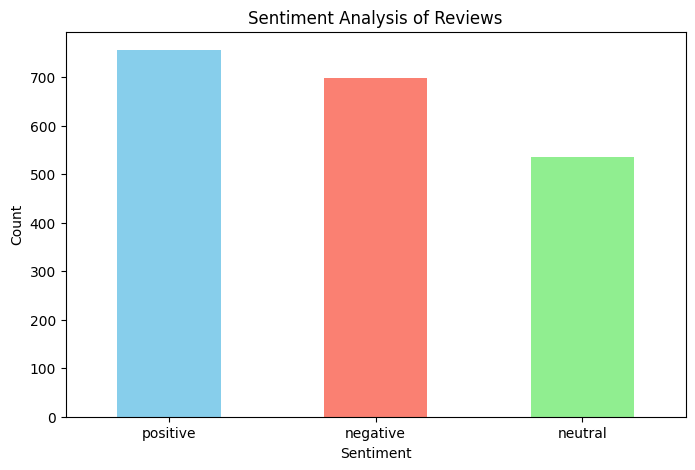

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

([<matplotlib.patches.Wedge at 0x1e9052a6dd0>,
 [Text(0.40525989620603975, 1.0226262350082116, 'positive'),
  Text(-1.0343202303699495, -0.3744084147658211, 'negative'),
  Text(0.89484736249067, -1.0108156102096424, 'neutral')],
 [Text(0.22105085247602166, 0.5577961281862972, '38.0%'),
  Text(-0.5641746711108814, -0.20422277169044784, '35.1%'),
  Text(0.5634224134200514, -0.6364394582801453, '26.9%')])

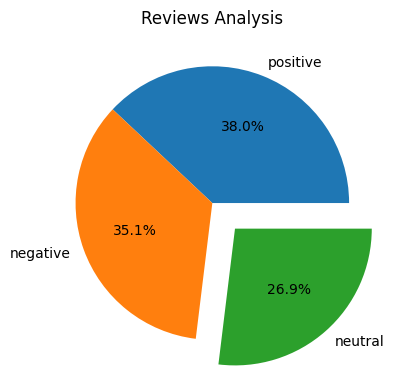

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(analysis.values, labels = analysis.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


<Axes: title={'center': 'Average Rating by Seat Type'}, xlabel='Seat Type'>

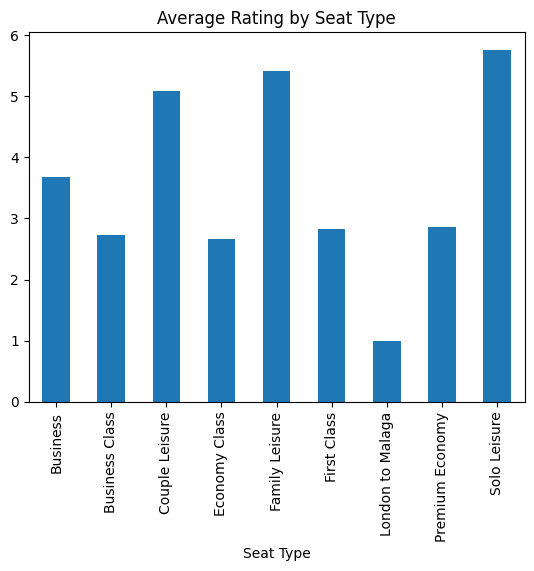

In [23]:
df.groupby('Seat Type')['Rating'].mean().plot(kind='bar', title='Average Rating by Seat Type')


In [25]:
correlations = df[['Rating', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value For Money']].corr()


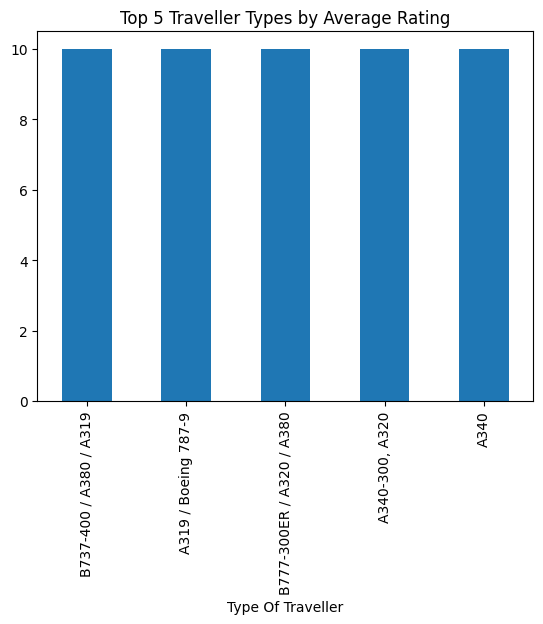

In [35]:
# Plot only the top 5 categories by rating
route_ratings = df.groupby('Type Of Traveller')['Rating'].mean().sort_values(ascending=False)
top_travellers = route_ratings.head(5)
top_travellers.plot(kind='bar', title='Top 5 Traveller Types by Average Rating')
plt.show()


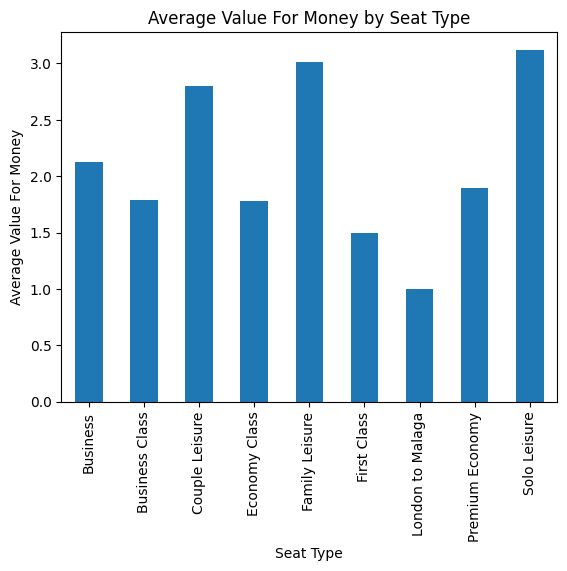

In [37]:
# Calculate the mean value for money rating by seat type and plot it as a bar chart
df.groupby('Seat Type')['Value For Money'].mean().plot(kind='bar', stacked=True, title='Average Value For Money by Seat Type')
plt.ylabel('Average Value For Money')
plt.show()


<Axes: title={'center': 'Recommendation Rate'}, ylabel='proportion'>

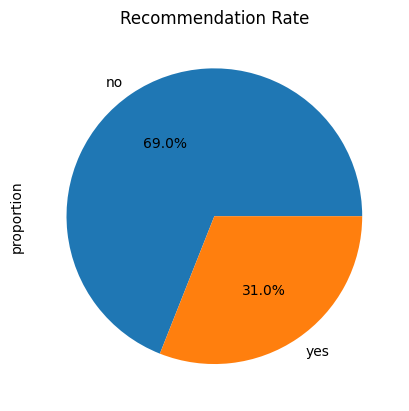

In [29]:
recommendation_rate = df['Recommended'].value_counts(normalize=True)
recommendation_rate.plot(kind='pie', autopct='%1.1f%%', title='Recommendation Rate')


In [42]:
# Display the frequency distribution of Seat Comfort ratings
seat_comfort_distribution = df['Seat Comfort'].value_counts() 
print(seat_comfort_distribution)


Seat Comfort
1.0    517
3.0    457
2.0    344
4.0    341
5.0    217
Name: count, dtype: int64


In [39]:
# Display the frequency distribution of Cabin Staff Service ratings
Cabin_Staff_Service = df['Cabin Staff Service'].value_counts()
print(Cabin_Staff_Service)

Cabin Staff Service
5.0    465
1.0    462
4.0    343
3.0    333
2.0    258
Name: count, dtype: int64


In [40]:
# Display the frequency distribution of Ground Service ratings
Ground_Service = df['Ground Service'].value_counts()
print(Ground_Service)

Ground Service
1.0    688
4.0    377
3.0    352
5.0    273
2.0    231
Name: count, dtype: int64
